<a href="https://colab.research.google.com/github/qking-123/predictive-analysis-assignment/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/data.csv', encoding='cp1252')
df.shape

df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [6]:
df = df.dropna(subset=['no2'])
len(df)

x = df['no2'].values
print(f"Mean: {np.mean(x):.2f}")
print(f"Std: {np.std(x):.2f}")
print(f"Min: {np.min(x):.2f}, Max: {np.max(x):.2f}")

r = 102483083
print(f"Roll Number: {r}")

Mean: 25.81
Std: 18.50
Min: 0.00, Max: 876.00
Roll Number: 102483083


In [7]:
a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print(f"a_r = {a_r}")
print(f"b_r = {b_r}")

z = x + a_r * np.sin(b_r * x)

print(f"Transformed Mean: {np.mean(z):.2f}")
print(f"Transformed Std: {np.std(z):.2f}")

a_r = 0.15000000000000002
b_r = 1.2
Transformed Mean: 25.81
Transformed Std: 18.51


In [8]:
def probability_density(z_val, lambda_param, mu, c):
    return c * np.exp(-lambda_param * (z_val - mu)**2)

hist, bin_edges = np.histogram(z, bins='auto', density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [0.01, np.mean(z), 1.0]

params, covariance = curve_fit(probability_density, bin_centers, hist,
                               p0=initial_guess, maxfev=10000)

lambda_fit, mu_fit, c_fit = params

print(f"lambda = {lambda_fit:.6f}")
print(f"mu = {mu_fit:.6f}")
print(f"c = {c_fit:.6f}")

lambda = 0.003401
mu = 19.706869
c = 0.031942


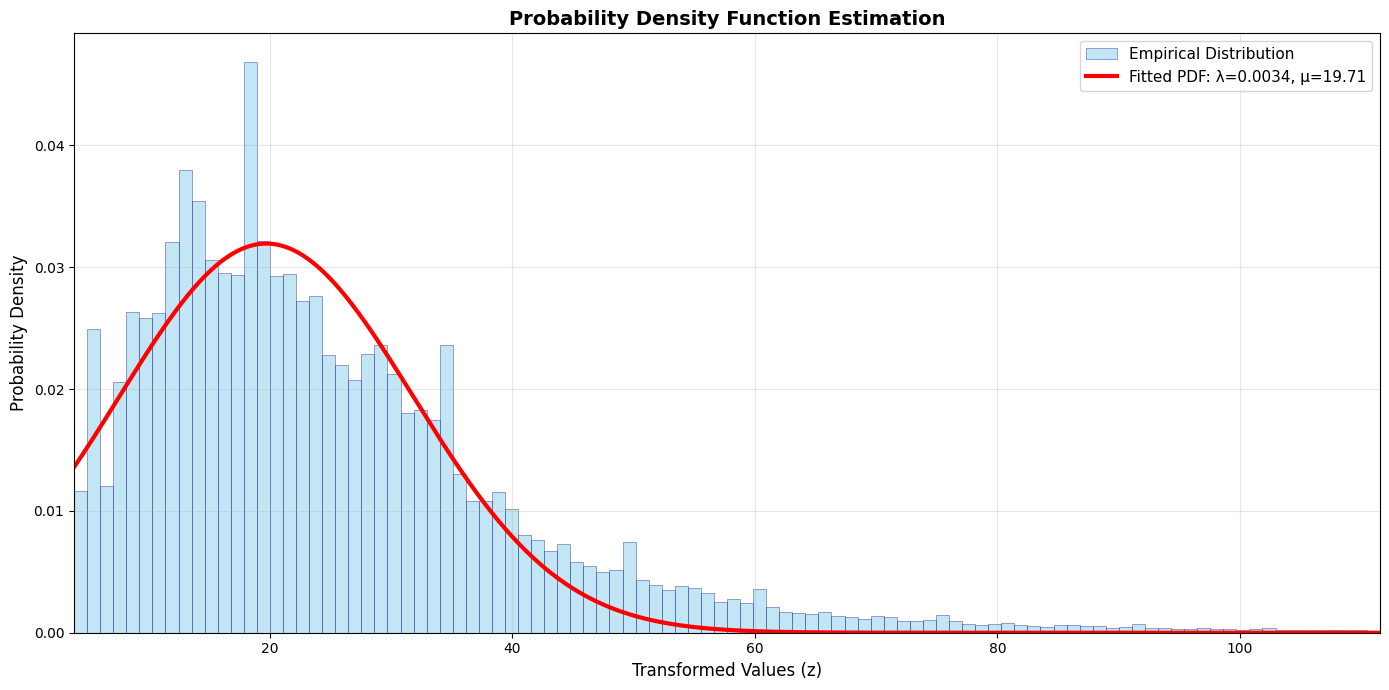

In [10]:
predicted_hist = probability_density(bin_centers, lambda_fit, mu_fit, c_fit)
q_low = np.percentile(z, 0.5)
q_high = np.percentile(z, 99.5)

z_plot = z[(z >= q_low) & (z <= q_high)]

plt.figure(figsize=(14, 7))

plt.hist(z_plot, bins=100, density=True, alpha=0.5, color='skyblue',
         edgecolor='darkblue', linewidth=0.5, label='Empirical Distribution')

z_smooth = np.linspace(q_low, q_high, 1000)
fitted_pdf = probability_density(z_smooth, lambda_fit, mu_fit, c_fit)

plt.plot(z_smooth, fitted_pdf, 'r-', linewidth=3,
         label=f'Fitted PDF: λ={lambda_fit:.4f}, μ={mu_fit:.2f}')

plt.xlim(q_low, q_high)
plt.xlabel('Transformed Values (z)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Probability Density Function Estimation', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('fitted_pdf.png', dpi=300)
plt.show()